In [1]:
from bentdna import shapefourier
import numpy as np
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
import matplotlib.pyplot as plt
hosts = ['a_tract_21mer', 'gcgc_21mer', 'tgtg_21mer', 'atat_21mer', 'ctct_21mer', 'g_tract_21mer', 'tat_21mer']
workfolder = '/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis'

In [2]:
def get_nlist_Lplist(df, L, n_begin, n_end):
    n_list = list(range(n_begin, n_end+1))
    Lp_list = list()
    for n in n_list:
        var_an = df[str(n)].var()
        Lp = np.square(L) / (np.square(n) * np.square(np.pi) * var_an)
        Lp_list.append(Lp)
    return n_list, Lp_list

def print_lp(host, nlist, Lplist, sele_nlist):
    print_list = [f'{host}:']
    for n, Lp in zip(nlist, Lplist):
        if n in sele_nlist:
            print_list.append(f'(n={n}, Lp={Lp:.2f})')
    print(' '.join(print_list))

In [3]:
n_begin = 0
n_end = 9
sele_nlist = [2, 3]

In [5]:
for host in hosts:
    s_agent = shapefourier.ShapeAgent(workfolder, host)
    df_an = s_agent.read_df_an(n_begin, n_end)
    L = s_agent.get_appr_L()
    nlist, Lplist = get_nlist_Lplist(df_an, L, n_begin, n_end)
    print_lp(host, nlist, Lplist, sele_nlist)

/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder exists
a_tract_21mer: (n=2, Lp=74.80) (n=3, Lp=69.05)
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/gcgc_21mer/an_folder exists
gcgc_21mer: (n=2, Lp=64.08) (n=3, Lp=51.57)
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tgtg_21mer/an_folder exists
tgtg_21mer: (n=2, Lp=55.57) (n=3, Lp=48.62)
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder exists
atat_21mer: (n=2, Lp=54.97) (n=3, Lp=51.70)
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/ctct_21mer/an_folder exists
ctct_21mer: (n=2, Lp=53.63) (n=3, Lp=44.85)
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/g_tract_21mer/an_folder exists
g_tract_21mer: (n=2, Lp=49.55) (n=3, Lp=45.14)
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tat_21mer/an_folder exists
tat_21mer: (n=2, Lp=68.23) (n=3, Lp=62.74)


<ipython-input-2-3b123b7be451>:6: RuntimeWarning: divide by zero encountered in double_scalars
  Lp = np.square(L) / (np.square(n) * np.square(np.pi) * var_an)


### Part 2: All systems plot

/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/a_tract_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/atat_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/ctct_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/g_tract_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/gcgc_21mer/an_folder exists
/home/yizaochen/codes/dna_rna/length_effect/find_helical_axis/tgtg_21mer/an_folder exists


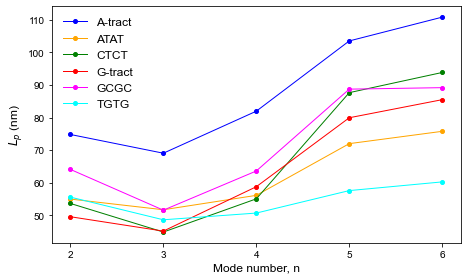

In [4]:
figsize = (6.6, 4)
agent = shapefourier.LpSixPlots(figsize)
agent.plot_main()
plt.tight_layout()
#plt.savefig('Lp_2_6.svg')
plt.show()